In [1]:
import numpy as np
import pandas as pd

In [8]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data',sep='\t',names=column_names)

In [9]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [11]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [12]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
df = pd.merge(df,movie_titles,on='item_id')

In [15]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

<AxesSubplot:>

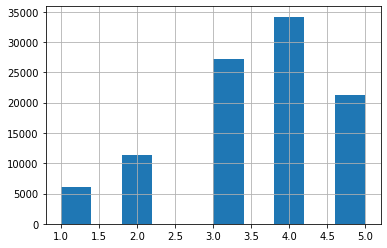

In [20]:
df['rating'].hist(bins=10)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [16]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [22]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [25]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean(),columns=['rating'])

In [26]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [29]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [30]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


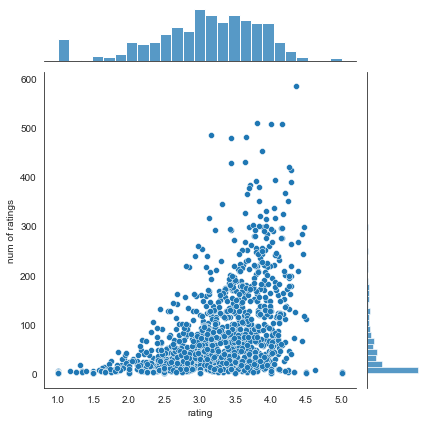

In [34]:
sns.jointplot(x='rating',y='num of ratings',data=ratings)

<AxesSubplot:>

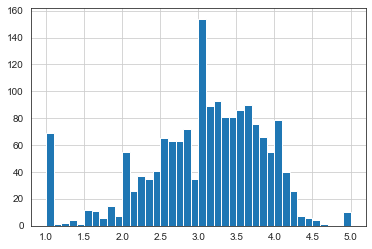

In [37]:
ratings['rating'].hist(bins=40)

<AxesSubplot:>

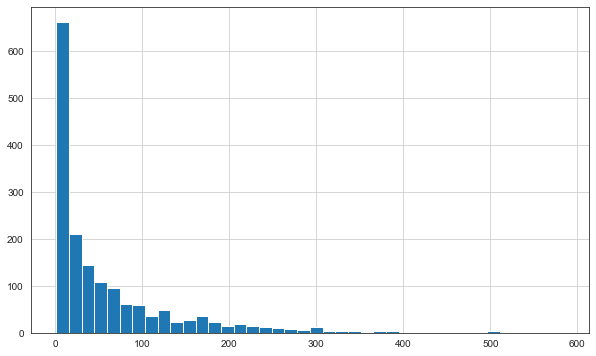

In [38]:
plt.figure(figsize=(10,6))
ratings['num of ratings'].hist(bins=40)

In [39]:
df.columns

Index(['user_id', 'item_id', 'rating', 'timestamp', 'title'], dtype='object')

# creating movie matrix

In [40]:
movie_mat = df.pivot_table(index='user_id',columns='title',values='rating')

In [41]:
movie_mat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
## lets pick some highly rated movies
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [43]:
#checking user ratings for star wars and scream

In [44]:
starwars_user_ratings = movie_mat['Star Wars (1977)']
scream_user_ratings = movie_mat['Scream (1996)']

In [46]:
starwars_user_ratings.mean()

4.359589041095891

In [47]:
# using corr with to find similar movies
similar_to_starwars = movie_mat.corrwith(starwars_user_ratings)

C:\Users\Shailu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Shailu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [48]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [49]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [50]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [51]:
corr_starwars.dropna(inplace=True)
corr_starwars.sort_values('Correlation',ascending=False)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


In [52]:
## remove movies that have low num of ratings typically less than 100

In [53]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [54]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [56]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [58]:
## same for scream
similar_to_scream = movie_mat.corrwith(scream_user_ratings)

C:\Users\Shailu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Shailu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [59]:
similar_to_scream 

title
'Til There Was You (1997)                0.454859
1-900 (1994)                            -0.944911
101 Dalmatians (1996)                    0.124059
12 Angry Men (1957)                     -0.025659
187 (1997)                               0.382836
                                           ...   
Young Guns II (1990)                     0.521852
Young Poisoner's Handbook, The (1995)    0.554289
Zeus and Roxanne (1997)                  0.981981
unknown                                  0.827837
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [61]:
corr_scream = pd.DataFrame(similar_to_scream,columns=['Correlation'])

In [63]:
corr_scream = corr_scream.join(ratings['num of ratings'])

In [64]:
corr_scream.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.454859,9
1-900 (1994),-0.944911,5
101 Dalmatians (1996),0.124059,109
12 Angry Men (1957),-0.025659,125
187 (1997),0.382836,41


In [65]:
corr_scream[corr_scream['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Scream (1996),1.000000,478
Scream 2 (1997),0.706028,106
Seven (Se7en) (1995),0.435188,236
Starship Troopers (1997),0.419322,211
"Nightmare on Elm Street, A (1984)",0.410796,111
Cape Fear (1991),0.397245,171
Interview with the Vampire (1994),0.386182,137
Natural Born Killers (1994),0.383332,128
Young Guns (1988),0.381230,101


In [66]:
scream_corr_movies = corr_scream[corr_scream['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

In [67]:
scream_corr_movies

,Correlation,num of ratings
title,,
Scream (1996),1.000000,478
Scream 2 (1997),0.706028,106
Seven (Se7en) (1995),0.435188,236
Starship Troopers (1997),0.419322,211
"Nightmare on Elm Street, A (1984)",0.410796,111
Cape Fear (1991),0.397245,171
Interview with the Vampire (1994),0.386182,137
Natural Born Killers (1994),0.383332,128
Young Guns (1988),0.381230,101


In [71]:
recommensations_for_scream_viewers = list(scream_corr_movies.index)

In [72]:
recommensations_for_scream_viewers

['Scream (1996)',
 'Scream 2 (1997)',
 'Seven (Se7en) (1995)',
 'Starship Troopers (1997)',
 'Nightmare on Elm Street, A (1984)',
 'Cape Fear (1991)',
 'Interview with the Vampire (1994)',
 'Natural Born Killers (1994)',
 'Young Guns (1988)',
 'Happy Gilmore (1996)']